## Testing pair constructor class

In [2]:
from projLib.pair_constructor import PairConfiguration
from projLib.datasets import RealWorldIdentDataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import os
import json

In [6]:
config_2 = PairConfiguration(["/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/train.json", "/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/val.json", "/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/test.json"], "/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json", k=20, n=2)

/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/projLib/pair_constructor.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.valid_labels.loc[:,"content_combo"] = self.valid_labels["list_object"].apply(lambda x: frozenset(filter(lambda t: t in self.content_categories, x)))


In [8]:
config_2.valid_labels

,width,height,id,seq_name,dataset,neg_category_ids,not_exhaustive_category_ids,all_image_paths,segmentations,annotated_image_paths,...,fps,track_category_ids.11,track_category_ids.12,track_category_ids.13,track_category_ids.16,track_category_ids.14,track_category_ids.15,track_category_ids.17,n_content_objects,content_combo
0,640,480,0,v_f69ebe5b731d3e87c1a3992ee39c3b7e,YFCC100M,"[342, 57, 651, 357, 738]","[805, 95]","[frame0391.jpg, frame0392.jpg, frame0393.jpg, ...",{'2': {'rle': 'R]Y29e>4K>C6K5K4M3L4L5K5K5K3M7I...,frame0391.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(805.0, 95.0)"
1,640,480,0,v_f69ebe5b731d3e87c1a3992ee39c3b7e,YFCC100M,"[342, 57, 651, 357, 738]","[805, 95]","[frame0391.jpg, frame0392.jpg, frame0393.jpg, ...",{'2': {'rle': 'jem1>_>8oBAU;d0bDEY;?`DG^;=XDJg...,frame0396.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(805.0, 95.0)"
2,640,480,0,v_f69ebe5b731d3e87c1a3992ee39c3b7e,YFCC100M,"[342, 57, 651, 357, 738]","[805, 95]","[frame0391.jpg, frame0392.jpg, frame0393.jpg, ...",{'2': {'rle': '`Yl15c>;K:^CYOZ:l0ZE@`:f0VEBg:c...,frame0401.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(805.0, 95.0)"
3,640,480,0,v_f69ebe5b731d3e87c1a3992ee39c3b7e,YFCC100M,"[342, 57, 651, 357, 738]","[805, 95]","[frame0391.jpg, frame0392.jpg, frame0393.jpg, ...",{'2': {'rle': 'YUi14k>3L201OI[A3d>N]A1c>N^A2b>...,frame0406.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(805.0, 95.0)"
4,640,480,0,v_f69ebe5b731d3e87c1a3992ee39c3b7e,YFCC100M,"[342, 57, 651, 357, 738]","[805, 95]","[frame0391.jpg, frame0392.jpg, frame0393.jpg, ...",{'2': {'rle': 'ldZ14k>100KL^A4a>O]A1i>000002NT...,frame0411.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(805.0, 95.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195677,1280,720,2986,KQT19,Charades,"[1125, 883, 366, 416, 254, 61, 829]",[],"[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",{'1': {'rle': 'bbe:4Xf08H8H8H8I7J5K2N3M3M2N3M3...,frame0811.jpg,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(235.0, 805.0)"
195678,1280,720,2986,KQT19,Charades,"[1125, 883, 366, 416, 254, 61, 829]",[],"[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",{'1': {'rle': 'd[a:3Yf08H8H8H8I7J4L2N3L4M2N3M3...,frame0841.jpg,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(235.0, 805.0)"
195679,1280,720,2986,KQT19,Charades,"[1125, 883, 366, 416, 254, 61, 829]",[],"[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",{'1': {'rle': 'd[a:3Yf08H8H8H8I7J4L2N3L4M2N3M3...,frame0871.jpg,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(235.0, 805.0)"
195680,1280,720,2986,KQT19,Charades,"[1125, 883, 366, 416, 254, 61, 829]",[],"[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",{'1': {'rle': 'bmX:4Xf08H9G8H9H7J5K2N3L4M2N3M3...,frame0901.jpg,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"(235.0, 805.0)"


In [9]:
config = PairConfiguration(["/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/train.json", "/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/val.json", "/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/test.json"], "/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json", k=20, n=1)

/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/projLib/pair_constructor.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.valid_labels.loc[:,"content_combo"] = self.valid_labels["list_object"].apply(lambda x: frozenset(filter(lambda t: t in self.content_categories, x)))


In [32]:
len(config.valid_labels)

6152

In [33]:
df = config.sample_pairs()
df["is_same_bg"] = df.apply(lambda row: os.path.dirname(row["image1"]) == os.path.dirname(row["image2"]), axis=1)
print(len(df))
print(df["is_same_bg"].sum())

3061
1283


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def plot_distribution_of_content_classes(config: PairConfiguration, log_scale = False):
    content_categories = config.content_categories
    category_frequencies = []
    for category in content_categories:
        contains = config.valid_labels["content_combo"].apply(lambda t: category in t)
        category_frequencies.append(int(contains.sum()))
    
    order=np.argsort(category_frequencies)

    sorted_categories = content_categories[order]
    sorted_frequencies = sorted(category_frequencies)

    print(sorted_categories[-5:])

    names = [config.categories_decoder[category] for category in sorted_categories]

    fig, ax = plt.subplots(1,figsize=(10,10))
    y_pos = range(len(names))
    ax.bar(height=sorted_frequencies, x=y_pos)
    rects = ax.patches
    for rect, label in zip(rects, sorted_frequencies):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )
    plt.xticks(y_pos, names, rotation=90)
    if log_scale:
        ax.set_yscale('log')
    plt.show()

In [5]:
def plot_distribution_of_number_of_content_objects(config: PairConfiguration):
    numbers_of_content_objects = list(config.raw_labels["n_content_objects"])
    unique_counts, frequencies = np.unique(numbers_of_content_objects, return_counts=True)
    fig, ax = plt.subplots(1,figsize=(10,10))
    ax.bar(height=frequencies, x=unique_counts, label=frequencies)
    rects = ax.patches
    for rect, label in zip(rects, frequencies):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )
    plt.show()

In [133]:
len(config.combo_to_image)

54

In [5]:
def plot_distribution_of_number_of_content_combinations(config: PairConfiguration, emphasize_class: float = None):
    combos = list(config.combo_to_image.keys())
    print(len(combos))
    frequencies = [len(value) for value in config.combo_to_image.values()]
    
    zipped = list(zip(combos, frequencies))
    
    zipped = sorted(zipped, key = lambda t: t[1])
    
    combos, frequencies = zip(*zipped)
    combos = list(combos)
    frequencies = list(frequencies)
    if emphasize_class is not None:
        color_array = ["tab:blue" if emphasize_class not in combo else "tab:red" for combo in combos]
    else:
        color_array = ["tab:blue"] * len(combos)

    fig, ax = plt.subplots(1,figsize=(18,10))
    ax.bar(height=frequencies, x=[6 * pos for pos in range(len(combos))], width = 3, color=color_array)
    rects = ax.patches
    for rect, label in zip(rects, frequencies):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )
    ax.axes.xaxis.set_visible(False)
    plt.show()


In [76]:
len(config.combo_to_image)

54

[1128.  817.  133.  347.  805.]


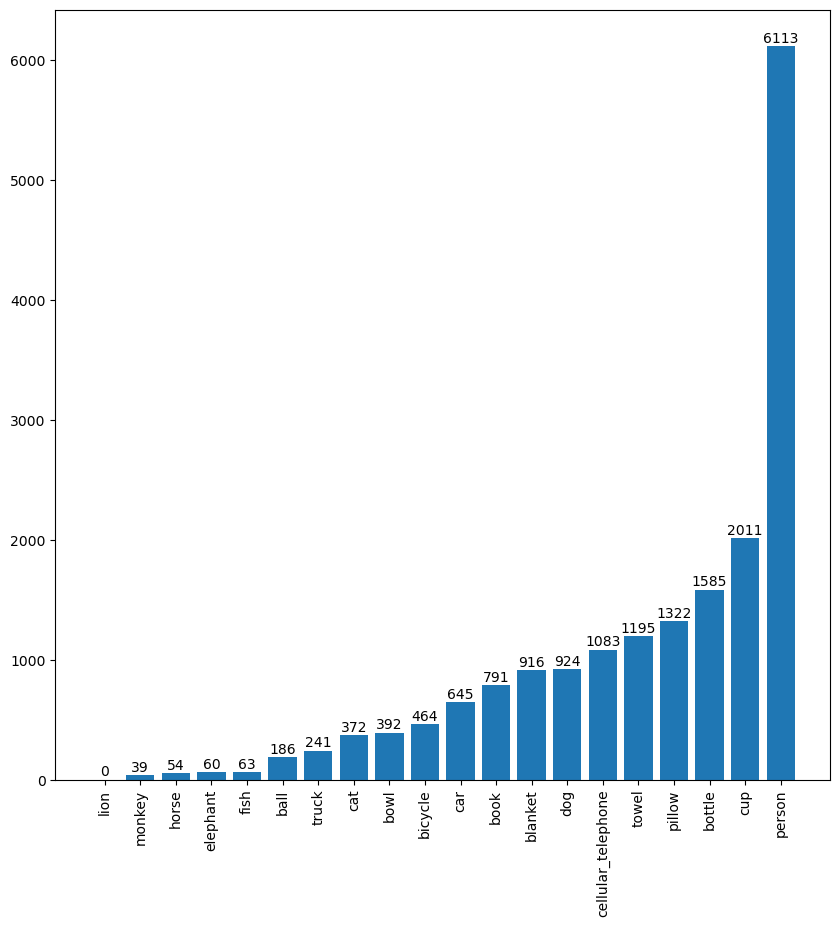

In [11]:
plot_distribution_of_content_classes(config)

20


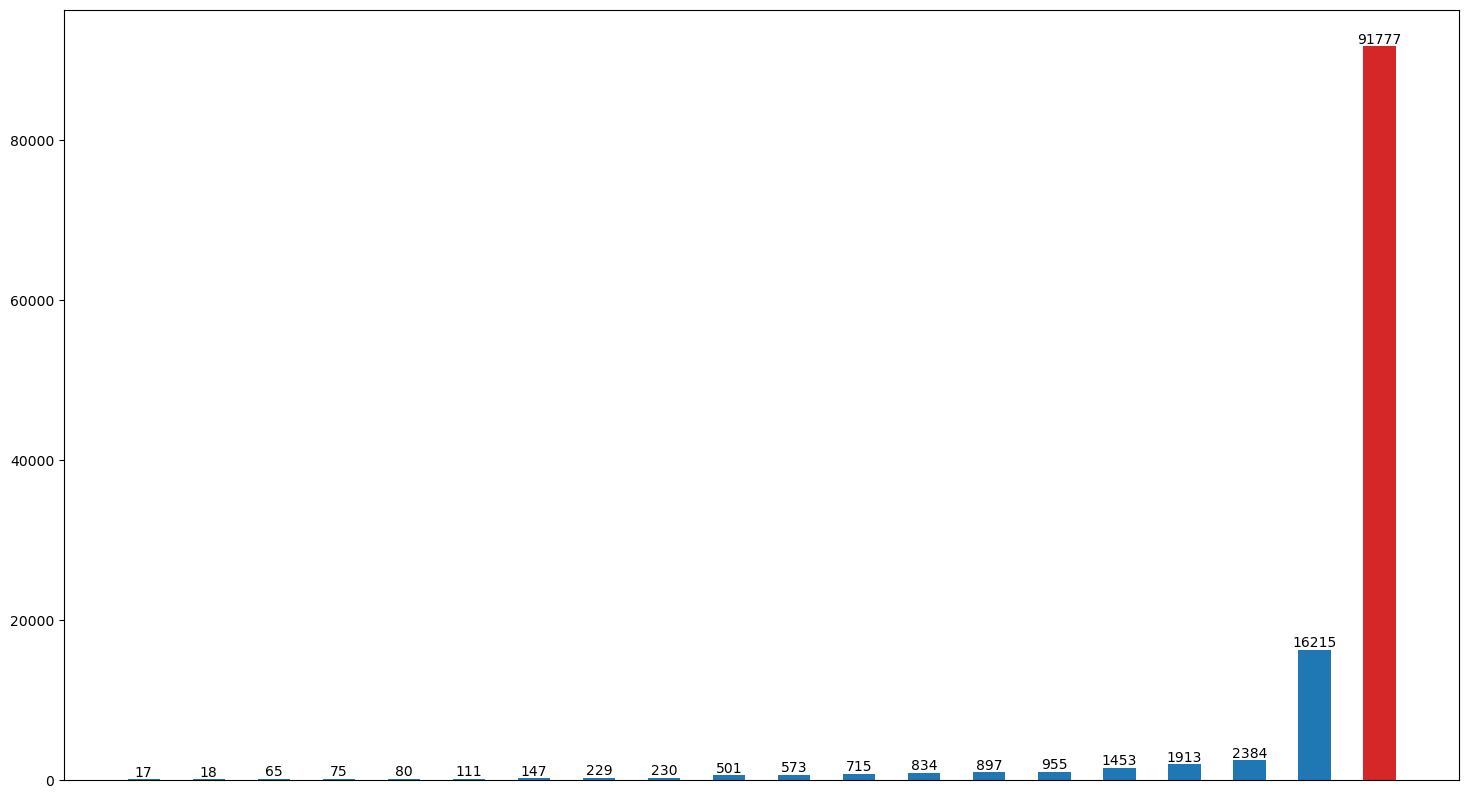

In [10]:
plot_distribution_of_number_of_content_combinations(config, 805)

6113


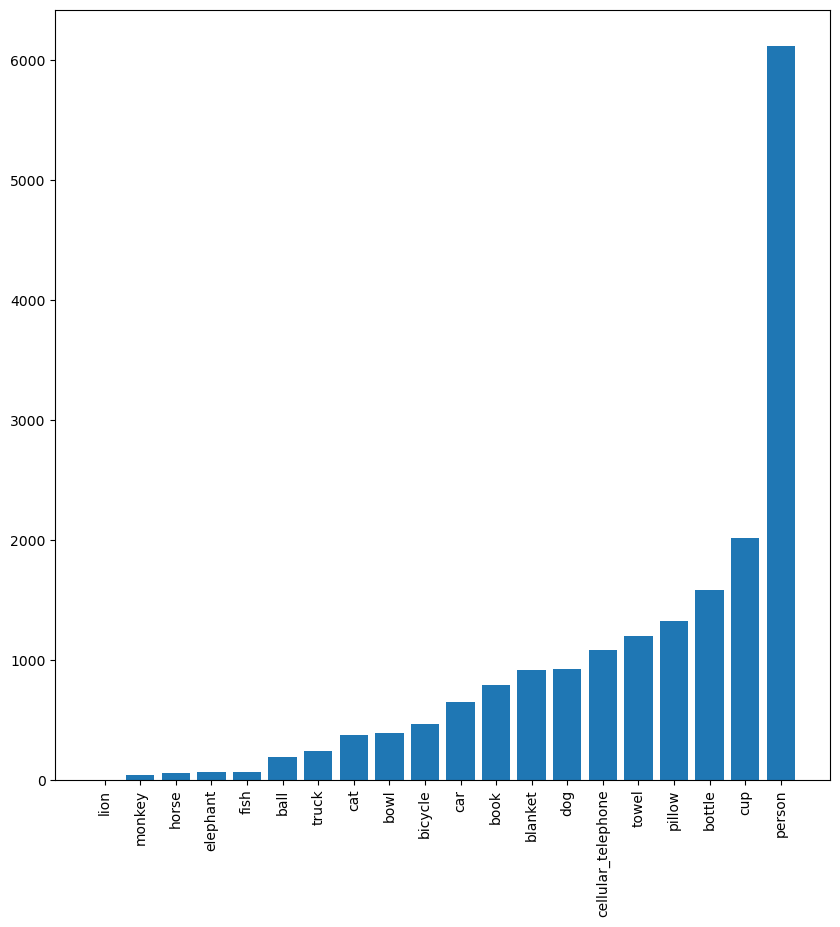

In [60]:
plot_distribution_of_content_classes(config)

In [13]:
import itertools

In [50]:
def plot_distribution_of_style_classes(config):
    style_classes = list(itertools.chain.from_iterable(list(config.valid_labels["list_object"].apply(lambda x: list(set(filter(lambda t: t in config.style_categories, x)))))))
    unique_style, frequencies = np.unique(style_classes, return_counts=True)

    order=np.argsort(frequencies)

    unique_style = unique_style[order]
    frequencies = frequencies[order]

    fig, ax = plt.subplots(1,figsize=(20,10))
    ax.bar(height=frequencies, x=[4*pos for pos in range(len(unique_style))], label=frequencies, width=3)
    rects = ax.patches
    for rect, label in zip(rects, frequencies):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )
    ax.axes.xaxis.set_visible(False)
    print(len(unique_style))
    plt.show()
    return unique_style

81


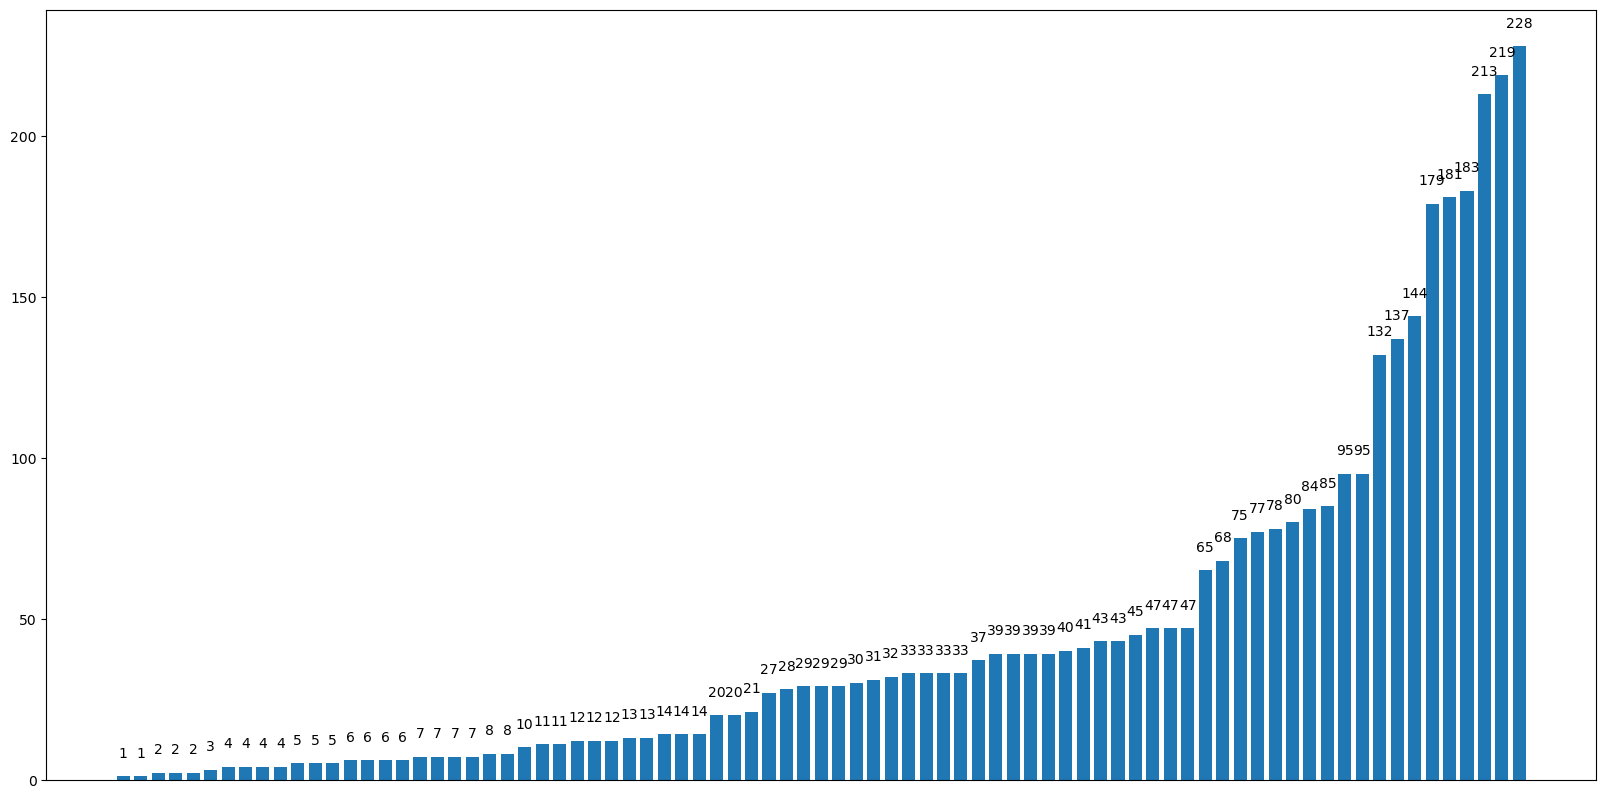

In [51]:
unique_style = plot_distribution_of_style_classes(config)

In [60]:
def plot_number_of_distinct_content_classes_co_occuring_with_style(config: PairConfiguration, styles):
    contents = []
    counts = []
    for style in styles:
        co_occuring_content = config.valid_labels["list_object"].apply(lambda t: [] if style not in t else list(set(filter(lambda x: x in config.content_categories, t))))
        contents.append(set(itertools.chain(*co_occuring_content)))
        counts.append(len(contents[-1]))

    order = np.argsort(counts)

    styles = styles[order]
    frequencies = sorted(counts)

    fig, ax = plt.subplots(1,figsize=(20,10))
    ax.bar(height=frequencies, x=range(len(styles)), label=frequencies)
    ax.xaxis.set_visible(False)
    print(len(styles))
    plt.show()
    

81


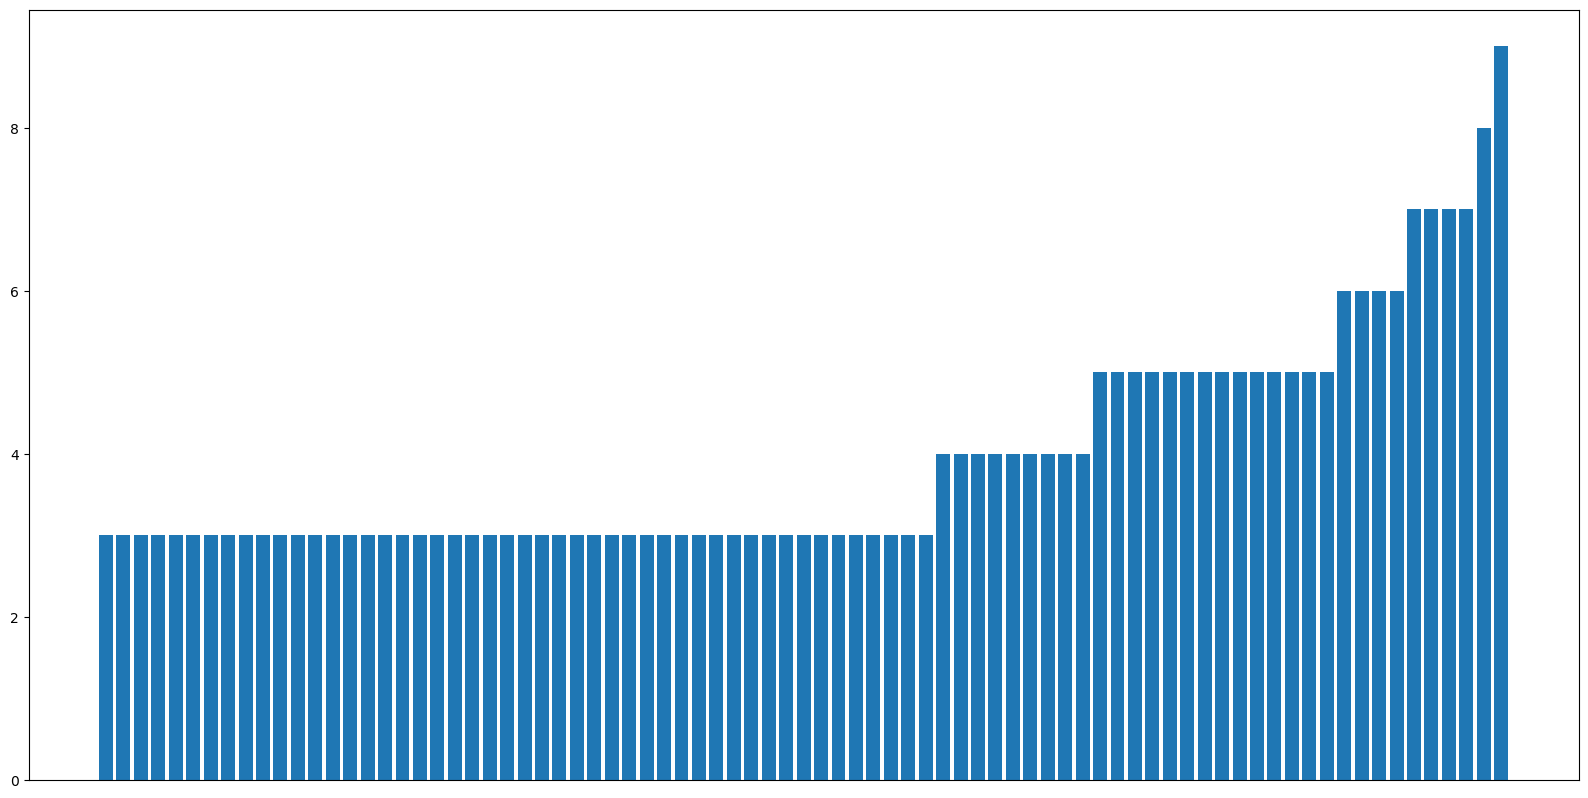

In [61]:
plot_number_of_distinct_content_classes_co_occuring_with_style(config, unique_style)

In [101]:
def plot_number_of_distinct_style_classes_co_occuring_with_content(config: PairConfiguration):
    styles = []
    counts = []
    for content in config.content_categories:
        co_occuring_style = config.valid_labels["list_object"].apply(lambda t: [] if content not in t else list(set(filter(lambda x: x in config.style_categories, t))))
        styles.append(set(itertools.chain(*co_occuring_style)))
        counts.append(len(styles[-1]))


    order = np.argsort(counts)

    contents = config.content_categories[order]
    frequencies = sorted(counts)

    

    fig, ax = plt.subplots(1,figsize=(10,10))
    ax.bar(height=frequencies, x=[config.categories_decoder[content] for content in contents], )
    plt.xticks(rotation=90)
    plt.show()

{568.0}


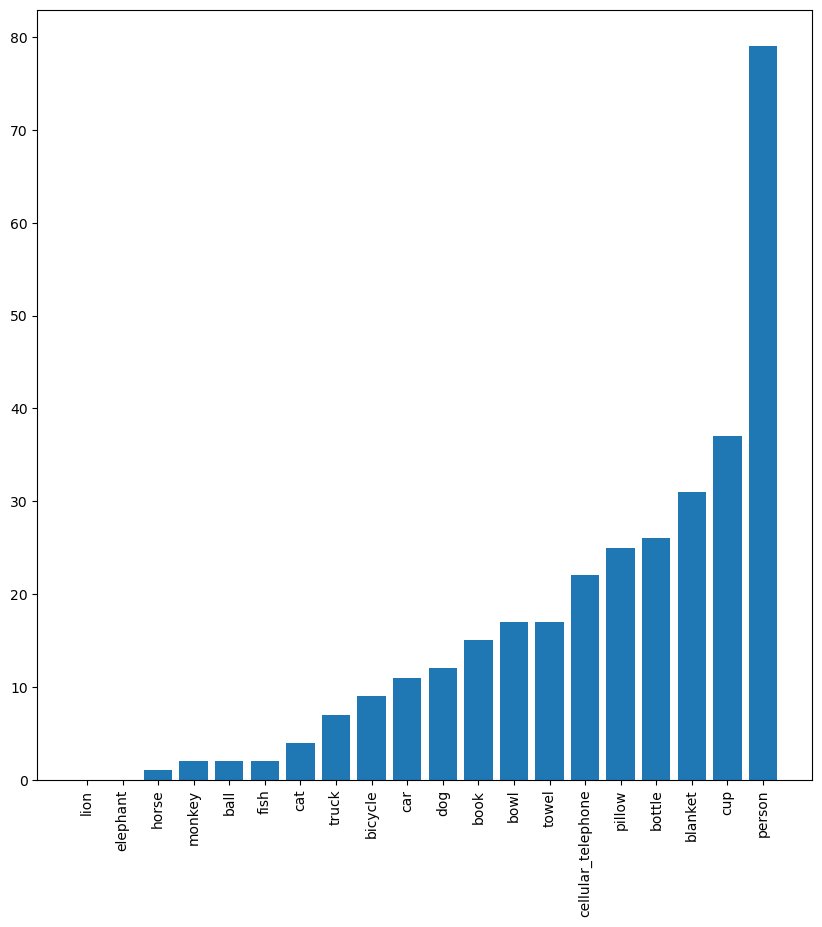

In [102]:
plot_number_of_distinct_style_classes_co_occuring_with_content(config)

In [5]:
dataset = RealWorldIdentDataset("/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data", config.sample_pairs())

In [28]:
dataset[-500]["content"]

[347.0, 805.0, 133.0]

In [30]:
config.categories_decoder[347]

'cup'

In [25]:
dataloader = DataLoader(dataset=dataset, batch_size=7)

In [27]:
r = next(iter(dataloader))

In [28]:
content = r['content']

In [34]:
list(zip(*[list(cont) for cont in content]))

[(tensor(347., dtype=torch.float64),
  tensor(805., dtype=torch.float64),
  tensor(126., dtype=torch.float64)),
 (tensor(347., dtype=torch.float64),
  tensor(805., dtype=torch.float64),
  tensor(126., dtype=torch.float64)),
 (tensor(347., dtype=torch.float64),
  tensor(805., dtype=torch.float64),
  tensor(126., dtype=torch.float64)),
 (tensor(347., dtype=torch.float64),
  tensor(805., dtype=torch.float64),
  tensor(126., dtype=torch.float64)),
 (tensor(347., dtype=torch.float64),
  tensor(805., dtype=torch.float64),
  tensor(126., dtype=torch.float64)),
 (tensor(347., dtype=torch.float64),
  tensor(805., dtype=torch.float64),
  tensor(126., dtype=torch.float64)),
 (tensor(347., dtype=torch.float64),
  tensor(805., dtype=torch.float64),
  tensor(126., dtype=torch.float64))]

In [38]:
config.categories_decoder[95]

'bicycle'

In [4]:
import numpy as np
import json

In [5]:
with open("/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json", "r") as f:
    categories = json.load(f)

In [6]:
categories

[{'frequency': 'c',
  'id': 2,
  'synset': 'aerosol.n.02',
  'image_count': 1,
  'instance_count': 1,
  'synonyms': ['aerosol_can', 'spray_can'],
  'def': 'a dispenser that holds a substance under pressure',
  'name': 'aerosol_can'},
 {'frequency': 'f',
  'id': 4,
  'synset': 'airplane.n.01',
  'image_count': 87,
  'instance_count': 122,
  'synonyms': ['airplane', 'aeroplane'],
  'def': 'an aircraft that has a fixed wing and is powered by propellers or jets',
  'name': 'airplane'},
 {'frequency': 'r',
  'id': 16,
  'synset': 'apricot.n.02',
  'image_count': 0,
  'instance_count': 0,
  'synonyms': ['apricot'],
  'def': 'downy yellow to rosy-colored fruit resembling a small peach',
  'name': 'apricot'},
 {'frequency': 'f',
  'id': 17,
  'synset': 'apron.n.01',
  'image_count': 24,
  'instance_count': 44,
  'synonyms': ['apron'],
  'def': 'a garment of cloth that is tied about the waist and worn to protect clothing',
  'name': 'apron'},
 {'frequency': 'f',
  'id': 20,
  'synset': 'armchai

In [7]:
from projLib.pair_constructor import PairConstructor

In [8]:
constructor_classes = PairConstructor("/home/lrabuzin/ETH/Sem3/sempro/train.json", "/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json", k=20, n=3)
# constructor_instances = PairConstructor("/home/lrabuzin/ETH/Sem3/sempro/train.json", count_instances=True, k=20, n=3)

KeyboardInterrupt: 

In [ ]:
# constructor_classes.viable_images["list_object"].apply(lambda x: frozenset(filter(lambda t: t in constructor_classes.content_classes, x))).unique()

array([frozenset({347, 805, 126}), frozenset({1128, 229, 805}),
       frozenset({1144, 211, 174}), frozenset({211, 805, 174}),
       frozenset({1144, 211, 805}), frozenset({211, 805, 95}),
       frozenset({1128, 805, 133}), frozenset({1128, 347, 805}),
       frozenset({817, 805, 126}), frozenset({805, 229, 211}),
       frozenset({1144, 805, 174}), frozenset({347, 805, 133}),
       frozenset({347, 235, 805}), frozenset({817, 805, 382}),
       frozenset({382, 805, 126}), frozenset({229, 805, 382}),
       frozenset({235, 805, 133}), frozenset({1128, 235, 805}),
       frozenset({235, 805, 382}), frozenset({1128, 805, 382}),
       frozenset({347, 805, 382}), frozenset({1128, 805, 126})],
      dtype=object)

In [ ]:
a = 0
for key, value in constructor_classes.combo_to_image.items():
    a += len(value)
print(a)

9039


In [ ]:
constructor_classes.viable_images["list_object"].apply(lambda x: frozenset(filter(lambda t: t in constructor_classes.content_classes, x))).unique()

array([frozenset({347, 805, 126}), frozenset({1128, 229, 805}),
       frozenset({1144, 211, 174}), frozenset({211, 805, 174}),
       frozenset({1144, 211, 805}), frozenset({211, 805, 95}),
       frozenset({1128, 805, 133}), frozenset({1128, 347, 805}),
       frozenset({817, 805, 126}), frozenset({805, 229, 211}),
       frozenset({1144, 805, 174}), frozenset({347, 805, 133}),
       frozenset({347, 235, 805}), frozenset({817, 805, 382}),
       frozenset({382, 805, 126}), frozenset({229, 805, 382}),
       frozenset({235, 805, 133}), frozenset({1128, 235, 805}),
       frozenset({235, 805, 382}), frozenset({1128, 805, 382}),
       frozenset({347, 805, 382}), frozenset({1128, 805, 126})],
      dtype=object)

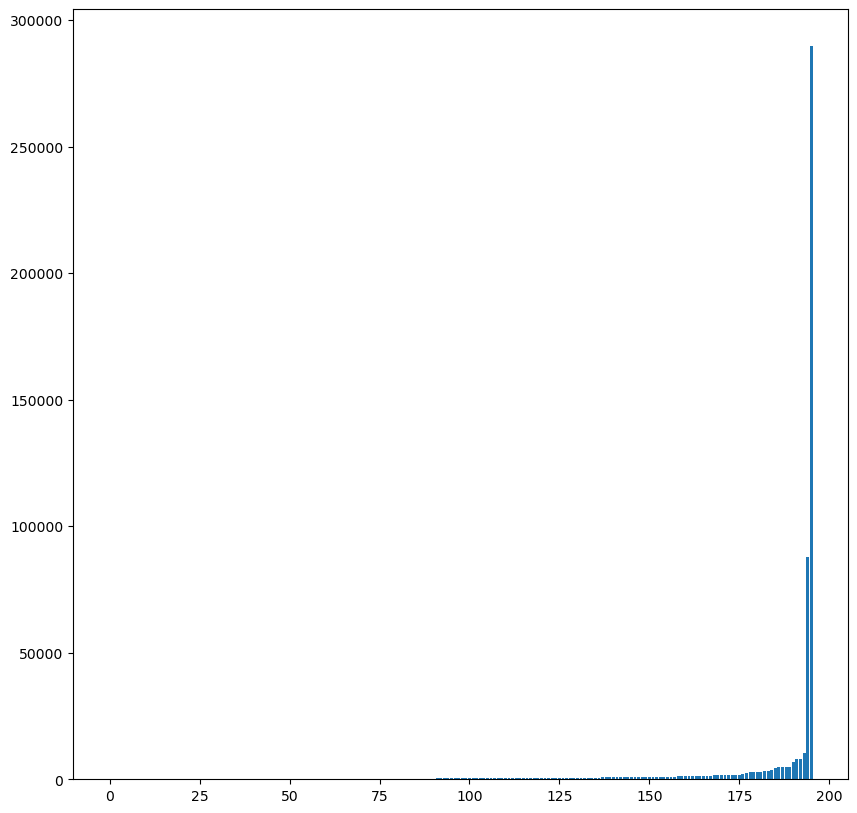

In [ ]:
constructor_classes.plot_class_distribution()

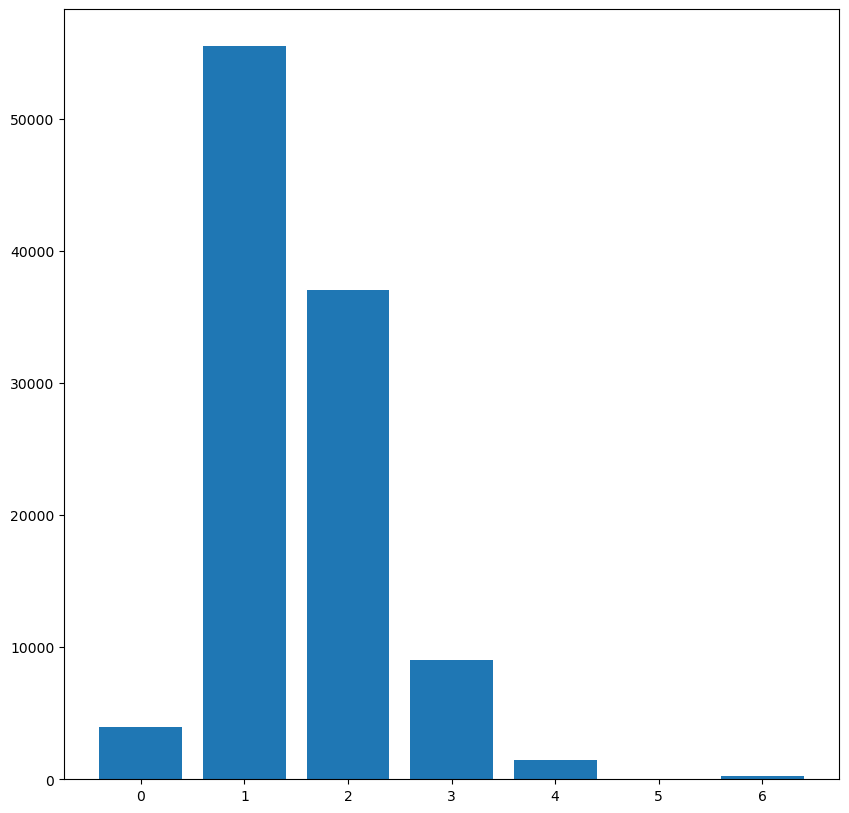

In [ ]:
constructor_classes.plot_content_object_number()

In [ ]:
constructor_classes.sorted_content_combination_frequencies[82]

2

In [ ]:
np.unique(constructor_classes.all_content_combinations, return_counts=True)

(array([frozenset({347, 805, 126}), frozenset({235, 805, 133}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 133}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 133}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 133}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 133}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({235, 805, 133}),
        frozenset({805, 347, 133}), frozenset({235, 805, 133}),
        frozenset({805, 347, 133}), frozenset({1128, 235, 805}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 382}),
        frozenset({1128, 805, 382}

In [ ]:
print(len(set(constructor_classes.sorted_content_combinations)))

22


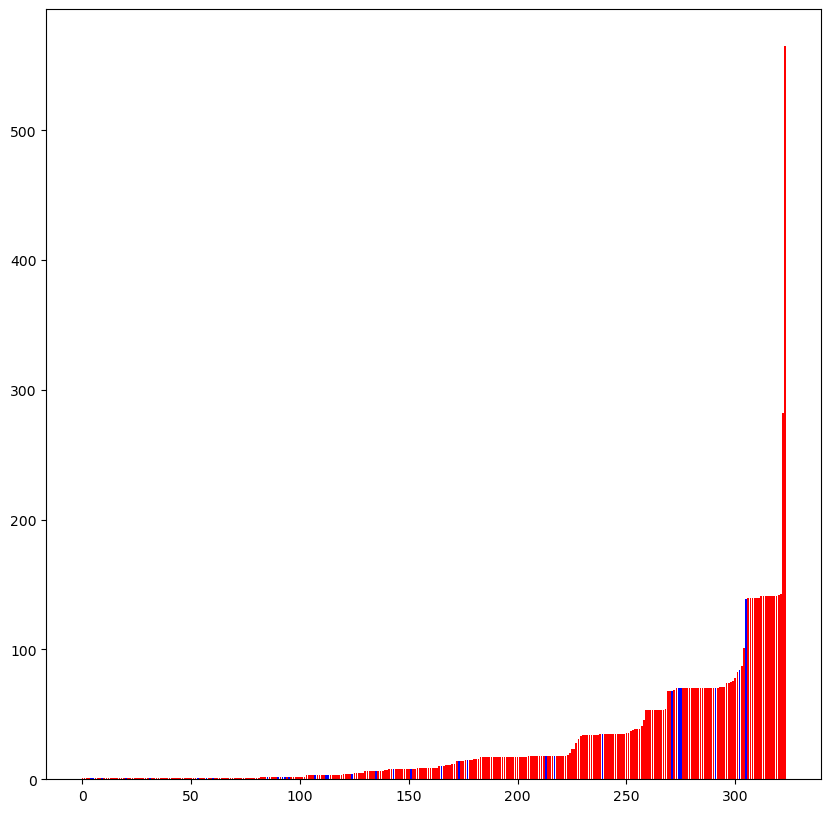

[frozenset({347, 805, 133}) frozenset({1144, 211, 805})]
[282 565]
9039


In [ ]:
constructor_classes.plot_most_frequent_content_combinations(log_scale=False, color_red = 805)
overwhelming_combos = constructor_classes.sorted_content_combinations[-2:]
print(constructor_classes.sorted_content_combinations[-2:])
print(constructor_classes.sorted_content_combination_frequencies[-2:])
print(len(constructor_classes.all_content_combinations))


In [ ]:
[(category['id'], category['synset']) for category in categories if (category["id"] in overwhelming_combos[0] or category["id"] in overwhelming_combos[1])]

[(133, 'bottle.n.01'),
 (211, 'car.n.01'),
 (347, 'cup.n.01'),
 (805, 'person.n.01'),
 (1144, 'truck.n.01')]

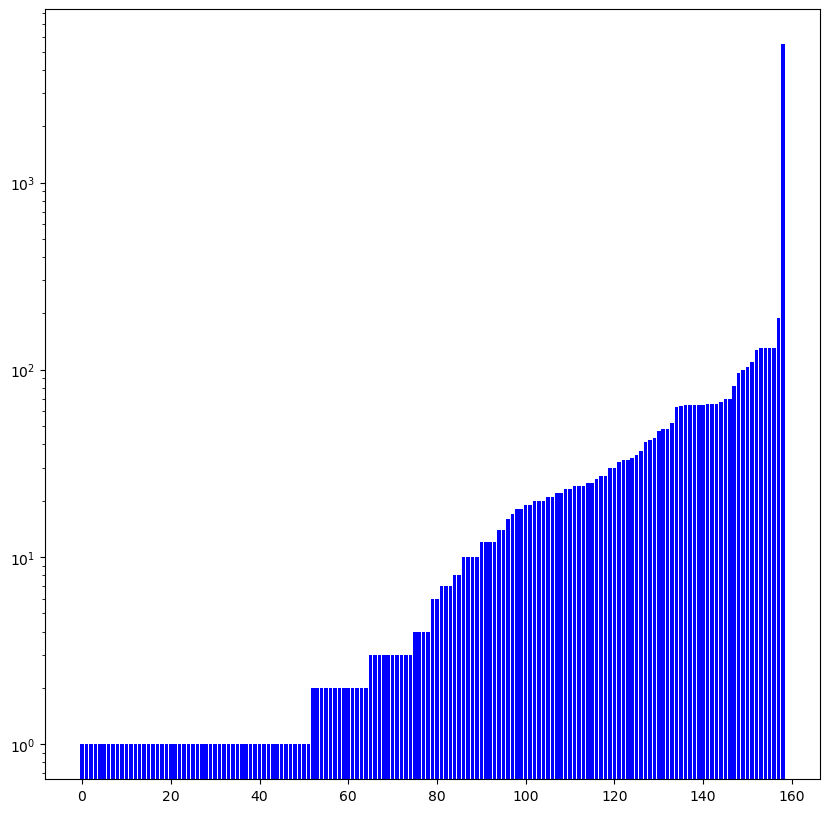

In [ ]:
constructor_classes.plot_most_frequent_style_combinations(log_scale=True, color_red=0)

In [ ]:
print(constructor_classes.sorted_style_combinations[-2:])
print(constructor_classes.sorted_style_combination_frequencies[-2:])

[frozenset({990}) frozenset()]
[ 189 5475]


In [ ]:
[(category['id'], category['synonyms']) for category in categories if category["id"] == 990]

[(990, ['slipper_(footwear)', 'carpet_slipper_(footwear)'])]

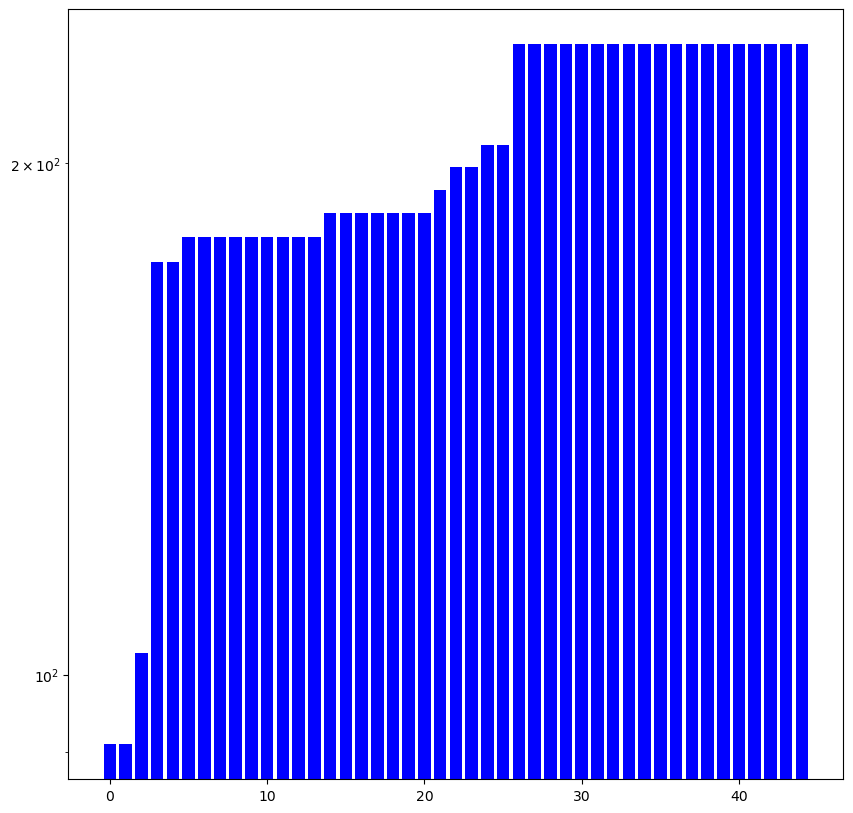

In [ ]:
constructor_classes.plot_most_frequent_values(constructor_classes.sorted_background_frequencies, constructor_classes.sorted_backgrounds, color_red=0)

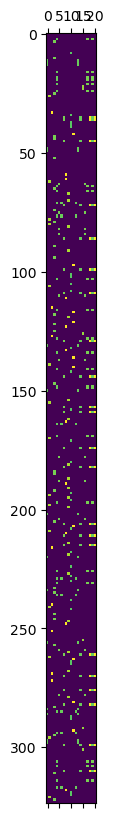

In [ ]:
style_classes = constructor_classes.plot_co_occurence_content_style()

In [ ]:
[(category['id'], category['synonyms']) for category in categories if category["id"] in style_classes]

[(110, ['blanket']),
 (129, ['booklet', 'brochure', 'leaflet', 'pamphlet']),
 (160, ['bucket', 'pail']),
 (208, ['bottle_cap', 'cap_(container_lid)']),
 (224, ['carton']),
 (237, ['chair']),
 (290, ['coffeepot']),
 (352, ['curtain', 'drapery']),
 (355, ['cutting_tool']),
 (395, ['drawer']),
 (604, ['jeep', 'landrover']),
 (714, ['motorcycle']),
 (754, ['packet']),
 (793, ['pen']),
 (926, ['sandwich']),
 (990, ['slipper_(footwear)', 'carpet_slipper_(footwear)']),
 (1001, ['sofa', 'couch', 'lounge']),
 (1062, ['sweater']),
 (1092, ['telephone', 'phone', 'telephone_set']),
 (1125, ['cover']),
 (1213, ['wine_bottle'])]

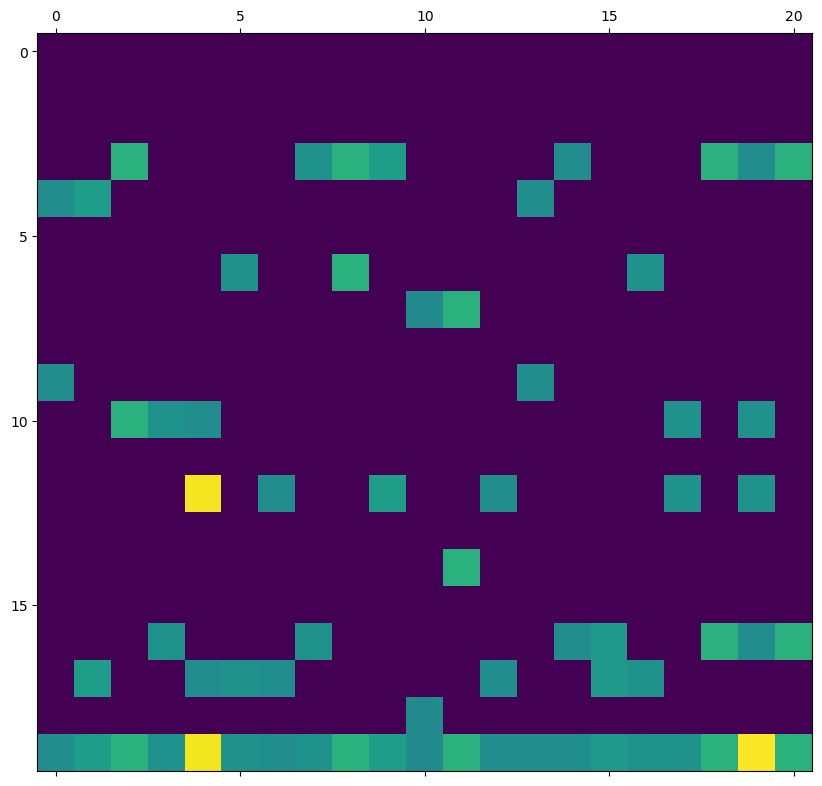

Int64Index([ 110,  129,  160,  208,  224,  237,  290,  352,  355,  395,  604,
             714,  754,  793,  926,  990, 1001, 1062, 1092, 1125, 1213],
           dtype='int64')


In [ ]:
constructor_classes.plot_single_content_style_co_occurence()

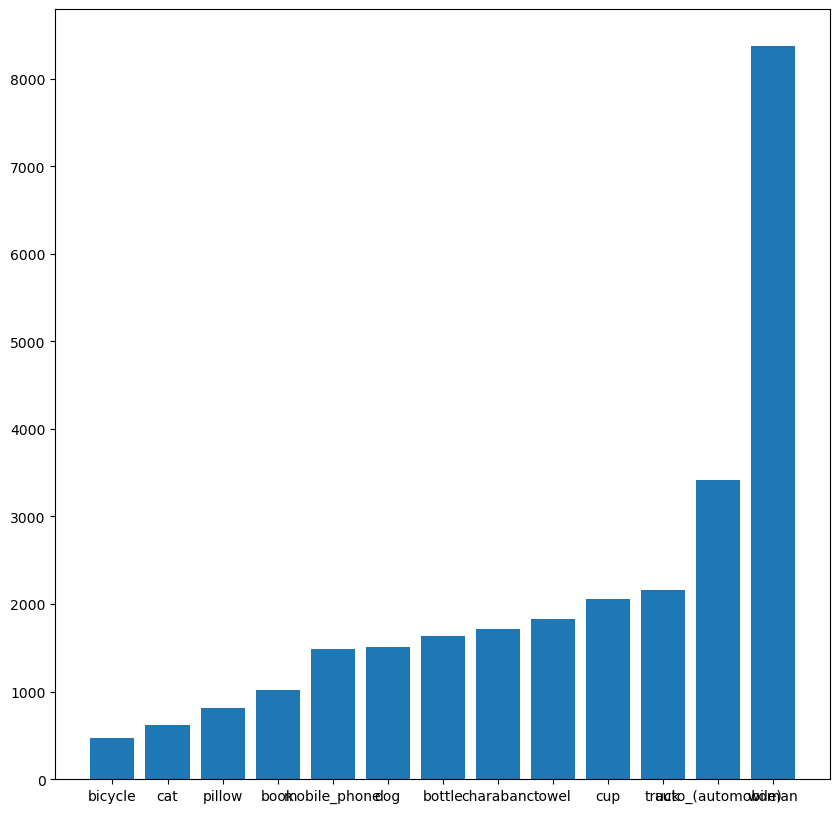

In [ ]:
constructor_classes.plot_viable_content_class_distribution()

In [ ]:
constructor_classes.style_classes

array([   2,    4,   16,   31,   32,   34,   35,   36,   38,   58,   60,
         74,   79,   80,   91,  110,  118,  129,  136,  139,  152,  156,
        160,  162,  176,  190,  191,  194,  197,  202,  208,  221,  224,
        237,  262,  266,  267,  289,  290,  302,  314,  336,  341,  342,
        352,  355,  356,  363,  373,  380,  395,  398,  405,  416,  422,
        428,  436,  437,  446,  458,  475,  495,  500,  502,  510,  531,
        533,  550,  554,  561,  572,  595,  601,  604,  611,  625,  627,
        633,  637,  641,  642,  644,  645,  651,  664,  676,  690,  697,
        707,  709,  713,  714,  726,  728,  732,  754,  757,  771,  780,
        792,  793,  804,  807,  811,  812,  821,  824,  825,  835,  850,
        868,  875,  876,  882,  896,  897,  914,  926,  932,  936,  937,
        938,  940,  942,  944,  953,  957,  960,  961,  965,  966,  969,
        972,  980,  982,  985,  987,  990,  996, 1001, 1012, 1014, 1016,
       1017, 1018, 1021, 1040, 1045, 1056, 1057, 10

In [ ]:
constructor_classes.sorted_content_combinations

array([frozenset({347, 805, 126}), frozenset({1144, 211, 805}),
       frozenset({235, 805, 133}), frozenset({805, 347, 133}),
       frozenset({1144, 211, 174}), frozenset({1144, 211, 174}),
       frozenset({1144, 211, 805}), frozenset({1144, 211, 805}),
       frozenset({211, 805, 174}), frozenset({1144, 211, 174}),
       frozenset({805, 347, 133}), frozenset({817, 805, 126}),
       frozenset({817, 805, 126}), frozenset({817, 805, 126}),
       frozenset({1144, 211, 805}), frozenset({1128, 805, 382}),
       frozenset({235, 805, 133}), frozenset({1128, 805, 126}),
       frozenset({235, 805, 133}), frozenset({235, 805, 133}),
       frozenset({1144, 211, 174}), frozenset({235, 805, 133}),
       frozenset({347, 805, 382}), frozenset({347, 805, 382}),
       frozenset({235, 805, 133}), frozenset({347, 805, 133}),
       frozenset({817, 805, 382}), frozenset({382, 805, 126}),
       frozenset({382, 805, 126}), frozenset({1128, 805, 126}),
       frozenset({1144, 211, 805}), frozense

In [ ]:
import functools
all_appearing_classes = set(functools.reduce(lambda a,b: a.union(b), constructor_classes.sorted_content_combinations))

In [ ]:
len(all_appearing_classes)

13